In [ ]:
import h5py
import hdf5plugin
import math

f = h5py.File("Cancer.h5",'r')   
print(f'Number of keys:', len(f.keys()))
my_spectra = []

count = -1
keys = list(f.keys())
for key in keys:
    count+=1
    my_spectra.append([count, f.get(key)["x"][:],f.get(key)["y"][:]])
  

print("Done adding to array!")    

Number of keys: 160000


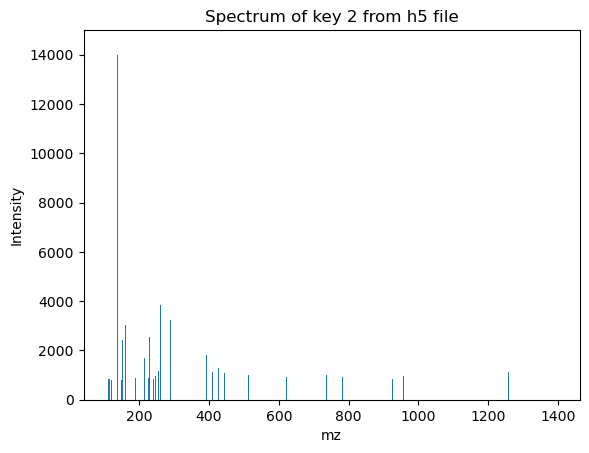

[105.39884736 105.39910392 105.39936049 105.39961706 105.39986256]
[696.32269287 747.27044678 599.48583984 357.26812744   0.        ]


In [ ]:
import matplotlib.pyplot as plt
spectrumx = my_spectra[2]
plt.bar(spectrumx[1],spectrumx[2])
title = "Spectrum of key " + str(spectrumx[0]) + " from h5 file"
plt.title(title)
plt.xlabel("mz")
plt.ylabel("Intensity")
plt.show()

print(spectrumx[1][5:10])
print(spectrumx[2][5:10])



400 25
Points found 9013


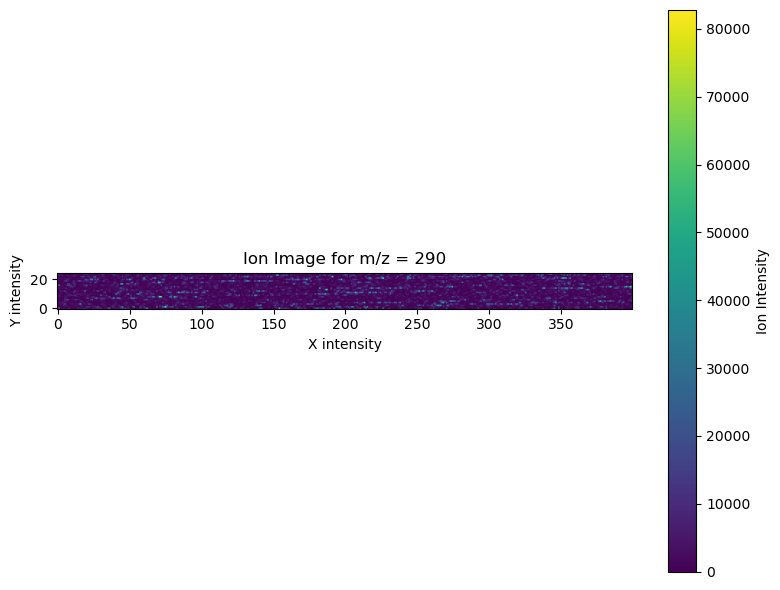

In [ ]:
import numpy as np
target_mz = 290
tolerance = 0.1

# Get image dimensions
all_coords = [(index%400,math.floor(index/400)) for  index,_,_ in my_spectra]
# print(all_coords)
xs, ys= zip(*all_coords)
width = max(xs) + 1
height = max(ys) + 1
print(width,height)



# Create empty image
ion_image = np.zeros((height, width))

# Fill in the ion image with intensities for target m/z
times = 0 
for index, mzs, intensities in my_spectra:
   
    mz_mask = (mzs >= target_mz - tolerance) & (mzs <= target_mz + tolerance)
    if np.any(mz_mask):
        times+=1
        x= index %400
        y = math.floor(index/400)
        ion_intensity = np.mean(intensities[mz_mask])
        ion_image[y, x] = ion_intensity
print(f"Points found", times)

# Plot the ion image
plt.figure(figsize=(8, 6))
plt.imshow(ion_image, cmap='viridis', origin='lower')
plt.colorbar(label='Ion Intensity')
plt.title(f"Ion Image for m/z = {target_mz}")
plt.xlabel("X intensity")
plt.ylabel("Y intensity")
plt.tight_layout()
plt.show()